In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import Counter
import random
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

____________________________________________________________________________________________________ 

Part A
Network Statistics:
Number of Nodes: 1622
Number of Edges: 9070
Average Degree: 11.183723797780518
Average Clustering Coefficient: 0.5546360657013015
Number of Connected Components: 193
Size of Largest Connected Component: 1004
Diameter of Largest Connected Component: 15
Average Shortest Path Length: 5.549228807601101

Number of high degree nodes (potential hubs): 252
Top 10 high degree nodes:
YOR063W: 127
YOL127W: 110
YDR064W: 104
YOR096W: 103
YLL045C: 98
YGR085C: 89
YMR242C: 87
YJR123W: 86
YLR029C: 85
YBL072C: 84
____________________________________________________________________________________________________ 

Part C

Initial Network Statistics:
Number of Nodes: 1622
Number of Edges: 9070
Average Degree: 11.183723797780518
Average Clustering Coefficient: 0.5546360657013015
Number of Connected Components: 193
Size of Largest Connected Component: 1004
Diameter of Largest Co

C:\Users\raksh\AppData\Local\Temp\ipykernel_4412\176379381.py:163: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  Rrobust = np.trapz(Rsizes, fractionR)
C:\Users\raksh\AppData\Local\Temp\ipykernel_4412\176379381.py:164: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  Trobust = np.trapz(Tsizes, fractionT)



Robustness Measures (Area Under Curve):
Random Deletion Robustness: 0.2427
Targeted Deletion Robustness: 0.1067
Ratio (Random/Targeted): 2.2748

RUNNING ENHANCED ANALYSIS

Visualizing YPI network...
Network visualization saved as ypiNetwork.png

Performing detailed degree distribution analysis...

Comparing deletion strategies with 3 random seeds...


C:\Users\raksh\AppData\Local\Temp\ipykernel_4412\176379381.py:357: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  randRobust = np.trapz(random_mean, common_x)
C:\Users\raksh\AppData\Local\Temp\ipykernel_4412\176379381.py:358: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  tarRobust = np.trapz(targeted_interp, common_x)



Detailed Robustness Analysis:
Random Deletion Robustness: 0.2347
Targeted Deletion Robustness: 0.1068
Ratio (Random/Targeted): 2.1984
Random Deletion Critical Threshold: 0.1253
Targeted Deletion Critical Threshold: 0.0581
Random/Targeted Critical Threshold Ratio: 2.1567

Preparing enhanced network export for Cytoscape...
Enhanced network exported to cystoscapefile.gexf with the following attributes:
  - degree_centrality: Normalized measure of node connectivity
  - betweenness_centrality: Measure of node importance in network information flow
  - clustering_coefficient: Measure of how connected a node's neighbors are to each other
  - degree: Raw node degree (number of connections)
  - node_type: Classification as 'hub' or 'non-hub'

Import this file into Cytoscape for enhanced visualization options.

ENHANCED ANALYSIS COMPLETE


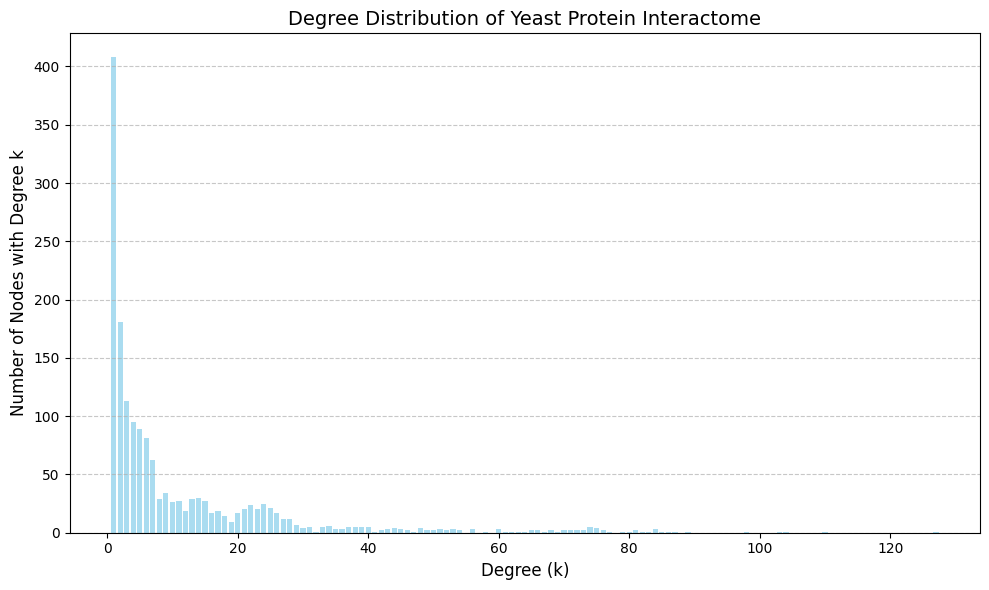

<Figure size 1000x600 with 0 Axes>

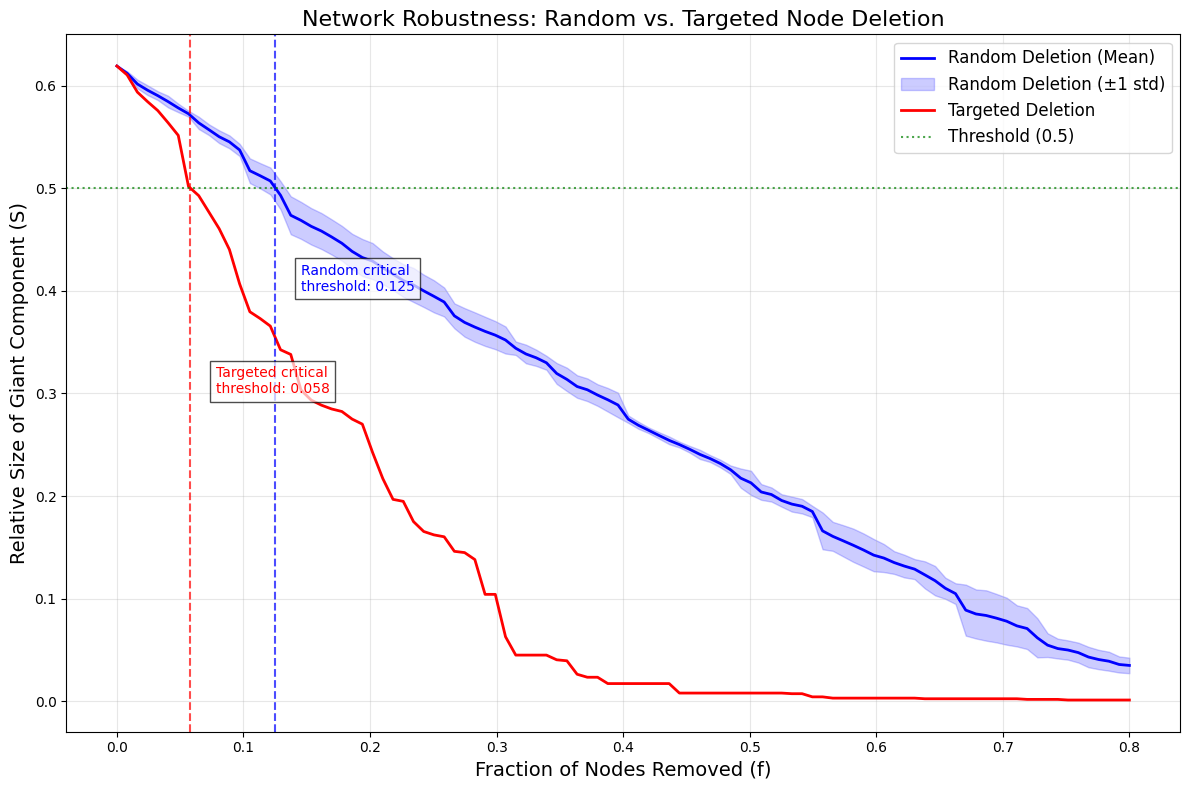

In [18]:
def creat(file_path):
    edges = []
    with open(file_path, 'r') as f:
        for line in f:
            if line.strip():
                source, target = line.strip().split('\t')
                edges.append((source, target))
    G = nx.Graph()
    G.add_edges_from(edges)
    return G


file_path = 'Collins.txt'
G = creat(file_path)
print("__"*50, "\n")
print("Part A")


def networkStats(G):
    nodes = G.number_of_nodes()
    edge = G.number_of_edges()
    deg = [d for n, d in G.degree()]
    avedeg = sum(deg) / nodes

    cc = nx.average_clustering(G)
    connCC = list(nx.connected_components(G))
    largCC = max(connCC, key=len)
    ccSize = len(largCC)
    larCC = G.subgraph(largCC)
    diameter = nx.diameter(larCC)
    avgPL = nx.average_shortest_path_length(larCC)

    stats = {'Number of Nodes': nodes, 'Number of Edges': edge, 'Average Degree': avedeg, 'Average Clustering Coefficient': cc, 'Number of Connected Components': len(
        connCC), 'Size of Largest Connected Component': ccSize, 'Diameter of Largest Connected Component': diameter, 'Average Shortest Path Length': avgPL}
    return stats


def plot(G):
    degrees = [d for n, d in G.degree()]
    degcnt = Counter(degrees)
    x = sorted(degcnt.keys())
    y = [degcnt[d] for d in x]
    plt.figure(figsize=(10, 6))
    plt.bar(x, y, color='skyblue', alpha=0.7)
    plt.xlabel('Degree (k)', fontsize=12)
    plt.ylabel('Number of Nodes with Degree k', fontsize=12)
    plt.title('Degree Distribution of Yeast Protein Interactome', fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig('degree_distribution.png')
    plt.figure(figsize=(10, 6))

    # xAxis = [count/len(G.nodes()) for count in y]
    # yAxis = [ck * k for ck, k in zip(xAxis, x)]

    # plt.loglog(x, yAxis, 'o-', color='blue', markersize=5)
    # plt.xlabel('Degree (k)', fontsize=12)
    # plt.ylabel('Cₖ × k', fontsize=12)
    # plt.title('Cₖ × k Plot (Log-Log Scale)', fontsize=14)
    # plt.grid(True, which="both", ls="-", alpha=0.2)
    # plt.tight_layout()
    # plt.savefig('plotC.png')

    return degcnt


file_path = 'Collins.txt'
G = creat(file_path)
stats = networkStats(G)
degree_counts = plot(G)
print("Network Statistics:")
for stat, value in stats.items():
    print(f"{stat}: {value}")
ghubs = [node for node, degree in G.degree() if degree >
         stats['Average Degree'] * 2]
print(f"\nNumber of high degree nodes (potential hubs): {len(ghubs)}")
if len(ghubs) > 0:
    print("Top 10 high degree nodes:")
    top_nodes = sorted(G.degree(), key=lambda x: x[1], reverse=True)[:10]
    for node, degree in top_nodes:
        print(f"{node}: {degree}")


def delRand(G, fractions):
    gCopy = G.copy()
    n = gCopy.number_of_nodes()
    numDel = int(fractions * n)
    gcSize = [len(max(nx.connected_components(gCopy), key=len)) / n]
    fractions = [0]
    nodes = list(gCopy.nodes())
    random.shuffle(nodes)
    for i, node in enumerate(nodes[:numDel]):
        if gCopy.has_node(node):
            gCopy.remove_node(node)
            if gCopy.number_of_nodes() > 0:
                components = list(nx.connected_components(gCopy))
                if components:
                    giant_size = len(max(components, key=len))/n
                else:
                    giant_size = 0
                current_fraction = (i + 1)/n
                gcSize.append(giant_size)
                fractions.append(current_fraction)

    return fractions, gcSize


def targeted_deletion(G, fractions):
    gCopy = G.copy()
    n = gCopy.number_of_nodes()
    num_to_delete = int(fractions * n)
    gcSize = [len(max(nx.connected_components(gCopy), key=len)) / n]
    fractions = [0]
    degreeSort = sorted(gCopy.degree(), key=lambda x: x[1], reverse=True)
    for i, (node, _) in enumerate(degreeSort[:num_to_delete]):
        if gCopy.has_node(node):
            gCopy.remove_node(node)
            if gCopy.number_of_nodes() > 0:
                components = list(nx.connected_components(gCopy))
                if components:
                    giant_size = len(max(components, key=len)) / n
                else:
                    giant_size = 0
                current_fraction = (i + 1) / n
                gcSize.append(giant_size)
                fractions.append(current_fraction)
    return fractions, gcSize


file_path = 'Collins.txt'
G = creat(file_path)
print("__"*50, "\n")
print("Part C")
stats = networkStats(G)
print("\nInitial Network Statistics:")
for stat, value in stats.items():
    print(f"{stat}: {value}")

fractions = 0.8
fractionR, Rsizes = delRand(G, fractions)
fractionT, Tsizes = targeted_deletion(G, fractions)

# plt.figure(figsize=(10, 6))
# plt.plot(fractionR, Rsizes, 'b-', label='Random Deletion')
# plt.plot(fractionT, Tsizes, 'r-', label='Targeted Deletion')
# plt.xlabel('Fraction of Nodes Removed (f)', fontsize=12)
# plt.ylabel('Relative Size of Giant Component (S)', fontsize=12)
# plt.title('Network Robustness: Random vs. Targeted Node Deletion', fontsize=14)
# plt.legend(fontsize=10)
# plt.grid(True, alpha=0.3)
# plt.tight_layout()
# plt.savefig('plot.png')
Rrobust = np.trapz(Rsizes, fractionR)
Trobust = np.trapz(Tsizes, fractionT)
print("\nRobustness Measures (Area Under Curve):")
print(f"Random Deletion Robustness: {Rrobust:.4f}")
print(f"Targeted Deletion Robustness: {Trobust:.4f}")
print(f"Ratio (Random/Targeted): {Rrobust / Trobust:.4f}")


def visualize_ypi_network(G, layout_type='spring', output_filename='graphvisual.png'):
    print("\nVisualizing YPI network...")
    largest_cc = max(nx.connected_components(G), key=len)
    G_viz = G.subgraph(largest_cc)
    degree_centrality = nx.degree_centrality(G_viz)
    betweenness_centrality = nx.betweenness_centrality(G_viz, k=min(500, len(G_viz)))
    clustering_coef = nx.clustering(G_viz)
    node_sizes = [5000 * degree_centrality[n] + 50 for n in G_viz.nodes()]
    node_colors = [clustering_coef[n] for n in G_viz.nodes()]
    colors = [(0.8, 0.9, 1.0), (0.0, 0.2, 0.8)]
    blue_cmap = LinearSegmentedColormap.from_list("BlueGradient", colors)

    plt.figure(figsize=(14, 14))

    if layout_type == 'spring':
        pos = nx.spring_layout(G_viz, k=0.3, iterations=50, seed=42)
    elif layout_type == 'kamada_kawai':
        pos = nx.kamada_kawai_layout(G_viz)
    elif layout_type == 'circular':
        pos = nx.circular_layout(G_viz)
    else:
        pos = nx.spring_layout(G_viz, seed=42)

    nx.draw_networkx_edges(G_viz, pos, alpha=0.2, width=0.5)

    nodes = nx.draw_networkx_nodes(
        G_viz,
        pos,
        node_size=node_sizes,
        node_color=node_colors,
        cmap=blue_cmap,
        alpha=0.8,
        edgecolors='white',
        linewidths=0.5
    )

    plt.colorbar(nodes, label='Clustering Coefficient')

    hub_threshold = sorted(degree_centrality.values(), reverse=True)[min(20, len(degree_centrality)-1)]
    hub_labels = {n: n for n in G_viz.nodes() if degree_centrality[n] >= hub_threshold}

    nx.draw_networkx_labels(G_viz,pos,labels=hub_labels,font_size=10,font_weight='bold',font_color='black',bbox=dict(facecolor='white', edgecolor='none', alpha=0.7, pad=1)
    )

    plt.title(f"YPI Visualization\n{G_viz.number_of_nodes()} nodes and {G_viz.number_of_edges()} edges", fontsize=16)
    plt.axis('off')
    plt.tight_layout()
    plt.savefig(output_filename, dpi=300, bbox_inches='tight')
    print(f"Network visualization saved as {output_filename}")
    plt.close()


def degDist(G, output_prefix='graphMetrics'):
    print("\nPerforming detailed degree distribution analysis...")

    degrees = dict(G.degree())
    degree_values = list(degrees.values())

    degree_counts = Counter(degree_values)
    x = sorted(degree_counts.keys())
    y = [degree_counts[d] for d in x]
    total_nodes = G.number_of_nodes()
    y_prob = [count / total_nodes for count in y]
    
    ccdf_y = []
    sum_probs = sum(y_prob)
    cumulative = 0
    for prob in y_prob:
        cumulative += prob / sum_probs
        ccdf_y.append(1 - cumulative)
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    
    ck_times_k = [ck * k for ck, k in zip(y_prob, x)]
    axes[0].loglog(x, ck_times_k, 'o-', color='green', markersize=5)
    axes[0].set_xlabel('Degree (k)', fontsize=12)
    axes[0].set_ylabel('C(k) × k', fontsize=12)
    axes[0].set_title('C(k) × k Plot (Log-Log Scale)', fontsize=14)
    axes[0].grid(True, which="both", ls="-", alpha=0.2)
    
    axes[1].loglog(x, ccdf_y, 'o-', color='purple', markersize=5)
    axes[1].set_xlabel('Degree (k)', fontsize=12)
    axes[1].set_ylabel('P(Degree ≥ k)', fontsize=12)
    axes[1].set_title('Complementary Cumulative Distribution (CCDF)', fontsize=14)
    axes[1].grid(True, which="both", ls="-", alpha=0.2)
    
    plt.tight_layout()
    plt.savefig(f'{output_prefix}plot.png', dpi=300)
    plt.close()
    
    return None



def nodeDelPlot(G, fraction_to_delete=0.8, seeds=5):
    print(f"\nComparing deletion strategies with {seeds} random seeds...")
    randFrac = []
    randSizes = []

    for seed in range(seeds):
        random.seed(seed)
        fractions_r, sizes_r = delRand(G, fraction_to_delete)
        randFrac.append(fractions_r)
        randSizes.append(sizes_r)
    fractions_t, sizes_t = targeted_deletion(G, fraction_to_delete)

    common_x = np.linspace(0, fraction_to_delete, 100)
    interpolated_random_y = []

    for i in range(seeds):
        x_unique = []
        y_unique = []
        last_x = -1
        for j in range(len(randFrac[i])):
            if randFrac[i][j] > last_x:
                x_unique.append(randFrac[i][j])
                y_unique.append(randSizes[i][j])
                last_x = randFrac[i][j]

        interpolated_y = np.interp(common_x, x_unique, y_unique)
        interpolated_random_y.append(interpolated_y)

    random_mean = np.mean(interpolated_random_y, axis=0)
    random_std = np.std(interpolated_random_y, axis=0)

    x_unique_t = []
    y_unique_t = []
    last_x = -1
    for j in range(len(fractions_t)):
        if fractions_t[j] > last_x:
            x_unique_t.append(fractions_t[j])
            y_unique_t.append(sizes_t[j])
            last_x = fractions_t[j]

    targeted_interp = np.interp(common_x, x_unique_t, y_unique_t)

    threshold_value = 0.5

    critical_random = None
    for i in range(len(common_x)-1):
        if random_mean[i] >= threshold_value and random_mean[i+1] < threshold_value:
            critical_random = common_x[i] + (common_x[i+1] - common_x[i]) * \
                (threshold_value - random_mean[i]) / \
                (random_mean[i+1] - random_mean[i])
            break

    critical_targeted = None
    for i in range(len(common_x)-1):
        if targeted_interp[i] >= threshold_value and targeted_interp[i+1] < threshold_value:
            critical_targeted = common_x[i] + (common_x[i+1] - common_x[i]) * \
                (threshold_value - targeted_interp[i]) / \
                (targeted_interp[i+1] - targeted_interp[i])
            break

    plt.figure(figsize=(12, 8))

    plt.plot(common_x, random_mean, 'b-',
             label='Random Deletion (Mean)', linewidth=2)
    plt.fill_between(common_x, random_mean - random_std, random_mean + random_std,
                     color='blue', alpha=0.2, label='Random Deletion (±1 std)')

    plt.plot(common_x, targeted_interp, 'r-',
             label='Targeted Deletion', linewidth=2)

    if critical_random:
        plt.axvline(x=critical_random, color='blue', linestyle='--', alpha=0.7)
        plt.text(critical_random+0.02, 0.4, f'Random critical\nthreshold: {critical_random:.3f}',
                 color='blue', fontsize=10, bbox=dict(facecolor='white', alpha=0.7))

    if critical_targeted:
        plt.axvline(x=critical_targeted, color='red',
                    linestyle='--', alpha=0.7)
        plt.text(critical_targeted+0.02, 0.3, f'Targeted critical\nthreshold: {critical_targeted:.3f}',
                 color='red', fontsize=10, bbox=dict(facecolor='white', alpha=0.7))

    plt.axhline(y=threshold_value, color='green', linestyle=':', alpha=0.7,
                label=f'Threshold ({threshold_value:.1f})')

    plt.xlabel('Fraction of Nodes Removed (f)', fontsize=14)
    plt.ylabel('Relative Size of Giant Component (S)', fontsize=14)
    plt.title('Network Robustness: Random vs. Targeted Node Deletion', fontsize=16)
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('plotDelNodes.png', dpi=300)

    randRobust = np.trapz(random_mean, common_x)
    tarRobust = np.trapz(targeted_interp, common_x)

    print("\nDetailed Robustness Analysis:")
    print(f"Random Deletion Robustness: {randRobust:.4f}")
    print(f"Targeted Deletion Robustness: {tarRobust:.4f}")
    print(
        f"Ratio (Random/Targeted): {randRobust / tarRobust:.4f}")

    if critical_random:
        print(f"Random Deletion Critical Threshold: {critical_random:.4f}")
    if critical_targeted:
        print(f"Targeted Deletion Critical Threshold: {critical_targeted:.4f}")

    if critical_random and critical_targeted:
        print(f"Random/Targeted Critical Threshold Ratio: {critical_random / critical_targeted:.4f}")

    return {'random_robustness': randRobust,'targeted_robustness': tarRobust,'critical_random': critical_random,'critical_targeted': critical_targeted
    }


def export_for_cytoscape(G, filename='cytoFile.gexf'):
    print(f"\nPreparing enhanced network export for Cytoscape...")

    G_export = G.copy()

    degree_cent = nx.degree_centrality(G)
    betweenness_cent = nx.betweenness_centrality(G, k=min(500, len(G)))
    clustering_coef = nx.clustering(G)

    for node in G_export.nodes():
        G_export.nodes[node]['degree_centrality'] = degree_cent[node]
        G_export.nodes[node]['betweenness_centrality'] = betweenness_cent[node]
        G_export.nodes[node]['clustering_coefficient'] = clustering_coef[node]
        G_export.nodes[node]['degree'] = G.degree[node]

        if G.degree[node] > 2 * (sum(dict(G.degree()).values()) / G.number_of_nodes()):
            G_export.nodes[node]['node_type'] = 'hub'
        else:
            G_export.nodes[node]['node_type'] = 'non-hub'

    nx.write_gexf(G_export, filename)
    print(f"Enhanced network exported to {filename} with the following attributes:")
    print("  - degree_centrality: Normalized measure of node connectivity")
    print("  - betweenness_centrality: Measure of node importance in network information flow")
    print("  - clustering_coefficient: Measure of how connected a node's neighbors are to each other")
    print("  - degree: Raw node degree (number of connections)")
    print("  - node_type: Classification as 'hub' or 'non-hub'")
    print("\nImport this file into Cytoscape for enhanced visualization options.")


print("\n" + "=="*30)
print("RUNNING ENHANCED ANALYSIS")
print("=="*30)


G = creat(file_path)
visualize_ypi_network(G, layout_type='spring',output_filename='ypiNetwork.png')


gamma = degDist(G, output_prefix='ypiDegree')

robustness_results = nodeDelPlot(G, fraction_to_delete=0.8, seeds=3)

export_for_cytoscape(G, filename='cystoscapefile.gexf')

print("\n" + "=="*30)
print("ENHANCED ANALYSIS COMPLETE")
print("=="*30)